In [141]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample
import sklearn

In [8]:
file = pd.read_csv("Bank Customer Churn Prediction.csv")

In [9]:
df = pd.DataFrame(file)

In [10]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.000000,1,1,1,101348.880000,1
1,15647311,608,Spain,Female,41,1,83807.860000,1,0,1,112542.580000,0
2,15619304,502,France,Female,42,8,159660.800000,3,1,0,113931.570000,1
3,15701354,699,France,Female,39,1,0.000000,2,0,0,93826.630000,0
4,15737888,850,Spain,Female,43,2,125510.820000,1,1,1,79084.100000,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [12]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

#>10000 data entries

#>no null values

#>12 columns

#>churn: target variable, 1== True, 0 ==False

# EDA

In [ ]:
#churn (Target Variable)

In [15]:
df['churn'].value_counts()

0    7963
1    2037
Name: churn, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

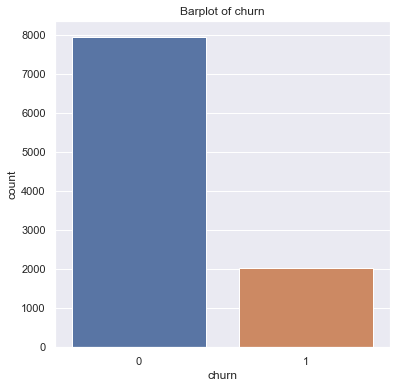

In [17]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['churn'])
plt.title('Barplot of churn')
plt.show

From the plot it is very clear that the target variable data is heavily imblanced with 1 being very largely under represented compared to grade 0.It is important to note that we have to balance this data for us to use models like decision tress and random forests as these models are extremely sensitive towards imbalanced data

# statistical tests on all predictor columns

In [19]:
#credit_score

<function matplotlib.pyplot.show(close=None, block=None)>

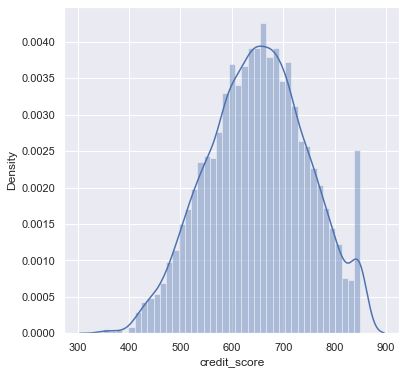

In [20]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['credit_score'])
plt.show

<AxesSubplot:>

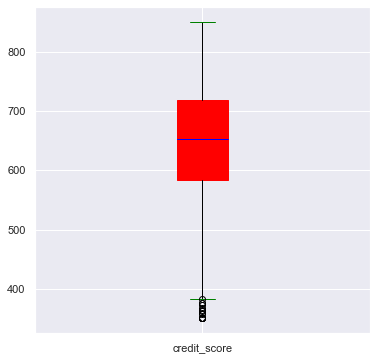

In [23]:
credit_score=df['credit_score']
plt.figure(figsize=(6,6))
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
credit_score.plot.box(color=props2,patch_artist=True,vert=True)

In [30]:
#is it a good predictor?
#Annova
annova=ols('credit_score ~ churn',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))  #Good Predictor

                  sum_sq          df        F   PR(>F)
churn       68567.991510    1.000000 7.344520 0.006740
Residual 93340691.714090 9998.000000      NaN      NaN


In [24]:
#country

In [25]:
df['country'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: country, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

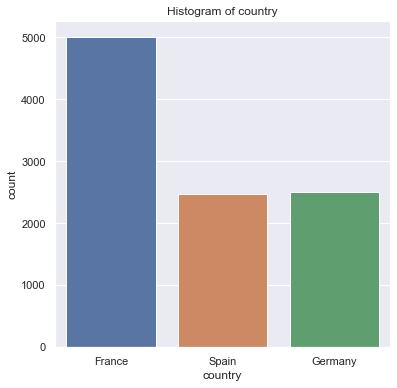

In [26]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['country'])
plt.title('Histogram of country') 
plt.show

In [29]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(df.churn, df.country)
chi2_contingency(ct_job, correction = False)#good predictor

(301.2553368243453,
 3.830317605354266e-66,
 2,
 array([[3992.6482, 1997.9167, 1972.4351],
        [1021.3518,  511.0833,  504.5649]]))

In [31]:
#gender

In [32]:
df['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

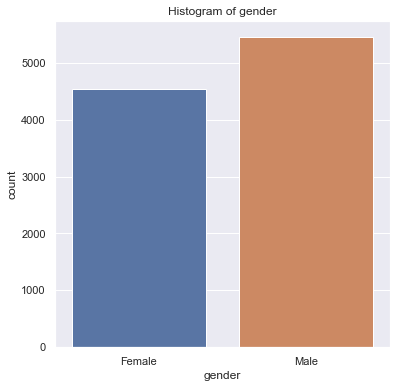

In [33]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['gender'])
plt.title('Histogram of gender') 
plt.show

In [34]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(df.churn, df.gender)
chi2_contingency(ct_job, correction = False)#good predictor

(113.44910030392086,
 1.7204149874840846e-26,
 1,
 array([[3617.5909, 4345.4091],
        [ 925.4091, 1111.5909]]))

In [35]:
#age

<function matplotlib.pyplot.show(close=None, block=None)>

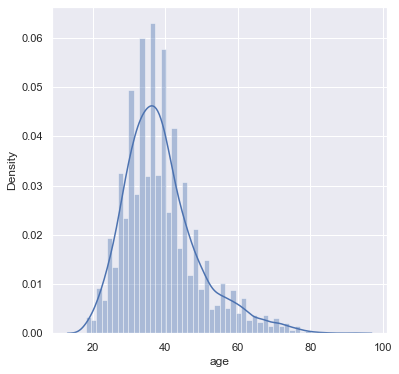

In [36]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.show

<AxesSubplot:>

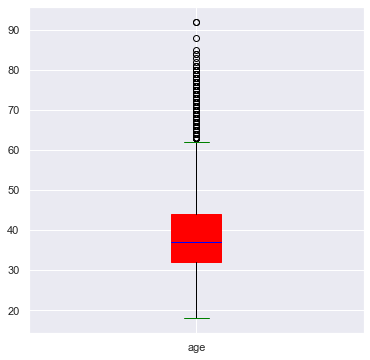

In [38]:
age=df['age']
plt.figure(figsize=(6,6))
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
age.plot.box(color=props2,patch_artist=True,vert=True)

In [39]:
#is it a good predictor?
#Annova
annova=ols('age ~ churn',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))  #Good Predictor

                 sum_sq          df          F   PR(>F)
churn      89536.388940    1.000000 886.063270 0.000000
Residual 1010294.458660 9998.000000        NaN      NaN


In [40]:
#tenure

In [41]:
df['tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: tenure, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

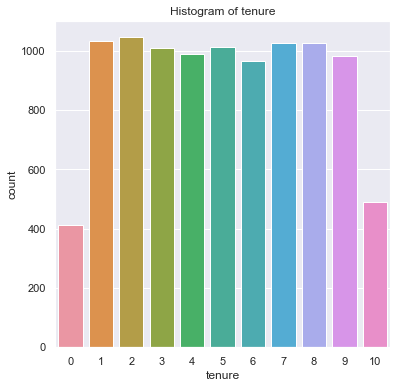

In [42]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['tenure'])
plt.title('Histogram of tenure') 
plt.show

In [43]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(df.churn, df.tenure)
chi2_contingency(ct_job, correction = False)#bad predictor

(13.900372600390284,
 0.17758462026413294,
 10,
 array([[328.8719, 824.1705, 834.5224, 803.4667, 787.5407, 805.8556,
         770.0221, 818.5964, 816.2075, 783.5592, 390.187 ],
        [ 84.1281, 210.8295, 213.4776, 205.5333, 201.4593, 206.1444,
         196.9779, 209.4036, 208.7925, 200.4408,  99.813 ]]))

In [44]:
#balance

<function matplotlib.pyplot.show(close=None, block=None)>

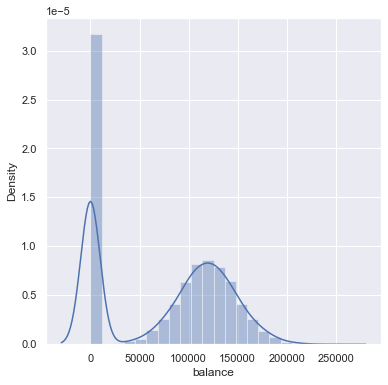

In [45]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['balance'])
plt.show

<AxesSubplot:>

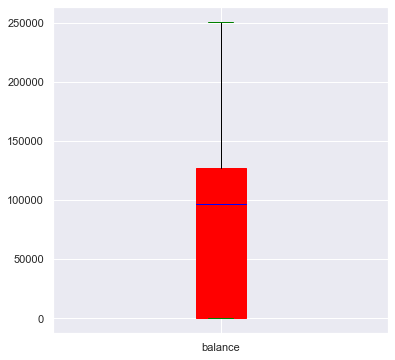

In [46]:
balance=df['balance']
plt.figure(figsize=(6,6))
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
balance.plot.box(color=props2,patch_artist=True,vert=True)

In [47]:
#is it a good predictor?
#Annova
annova=ols('balance ~ churn',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))  #Good Predictor

                        sum_sq          df          F   PR(>F)
churn      546973752381.542236    1.000000 142.473830 0.000000
Residual 38383494571349.867188 9998.000000        NaN      NaN


In [48]:
#products_number

In [49]:
df['products_number'].value_counts()

1    5084
2    4590
3     266
4      60
Name: products_number, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

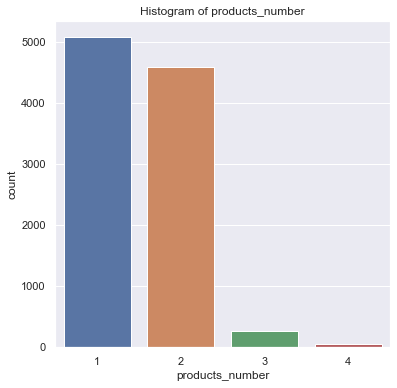

In [50]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['products_number'])
plt.title('Histogram of products_number') 
plt.show

In [51]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(df.churn, df.products_number)
chi2_contingency(ct_job, correction = False)#good predictor

(1503.6293615070408,
 0.0,
 3,
 array([[4048.3892, 3655.017 ,  211.8158,   47.778 ],
        [1035.6108,  934.983 ,   54.1842,   12.222 ]]))

In [52]:
#credit_card

In [53]:
df['credit_card'].value_counts()

1    7055
0    2945
Name: credit_card, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

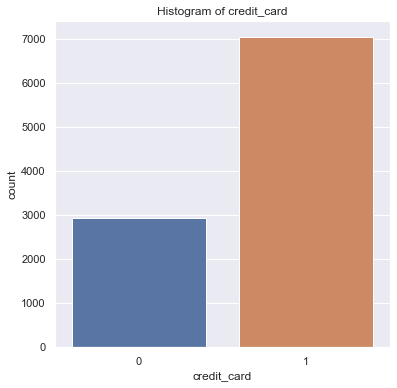

In [54]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['credit_card'])
plt.title('Histogram of credit_card') 
plt.show

In [55]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(df.churn, df.credit_card)
chi2_contingency(ct_job, correction = False)#good predictor

(0.5094769780392745,
 0.475365355970654,
 1,
 array([[2345.1035, 5617.8965],
        [ 599.8965, 1437.1035]]))

In [ ]:
#active_member

In [58]:
df['active_member'].value_counts()

1    5151
0    4849
Name: active_member, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

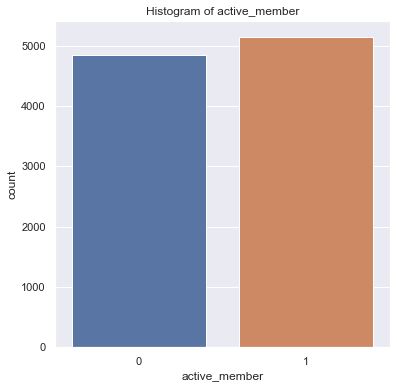

In [57]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(df['active_member'])
plt.title('Histogram of active_member') 
plt.show

In [56]:
#is it a good predictor?
#chi-square
ct_job = pd.crosstab(df.churn, df.active_member)
chi2_contingency(ct_job, correction = False)#good predictor

(243.7603925023214,
 5.953852540364172e-55,
 1,
 array([[3861.2587, 4101.7413],
        [ 987.7413, 1049.2587]]))

In [59]:
#estimated_salary

<function matplotlib.pyplot.show(close=None, block=None)>

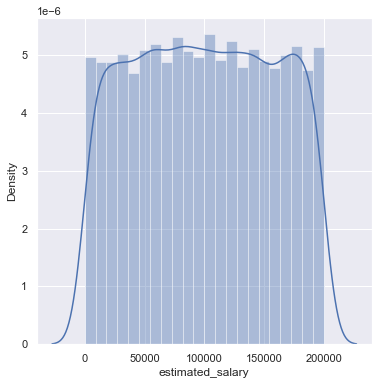

In [60]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['estimated_salary'])
plt.show

<AxesSubplot:>

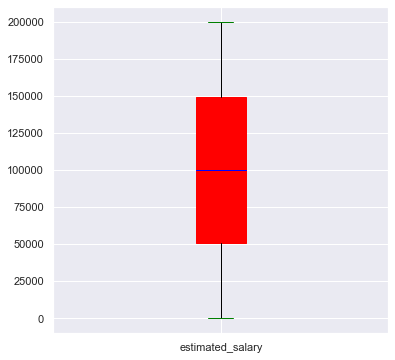

In [61]:
estimated_salary=df['estimated_salary']
plt.figure(figsize=(6,6))
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
estimated_salary.plot.box(color=props2,patch_artist=True,vert=True)

In [63]:
#is it a good predictor?
#Annova
annova=ols('estimated_salary ~ churn',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))  #bad Predictor

                        sum_sq          df        F   PR(>F)
churn        4839451361.633740    1.000000 1.463260 0.226440
Residual 33066420933199.343750 9998.000000      NaN      NaN


Key Findings
1. Tenure is from 0 to 10 hence the collected data is for 10 years
2. credit card = 0 & 1 ;; Use of credit card:7000 and not using credit card : 3000
3. Churn : for (0 : 8000) and (for 1: 2000) hence target variable is imbalanced, either to perform oversampling or undersampling
4. Credit score is normally distributed. mode = 650 for near abot 2000 people
5. Balance : Nearly 4000 people have zero balance in their account and have average balance maintained by others is arround 11000(11 lac) for 2000 people for remaing are litle more and other 2000 are less than that.
6. Active Member : Non- active and active are almost equal in number.
7.Estimated salary is uniformly distributed. Range from 25k to 20L is salary band. each slab have approx 1000 to 1500 customers among 8 portions. Hence data represents all sets of class of community having diff salary. min is 11/
8. Products offered to customers from 1 to 4, many of them avail any 2 of them nearly 5000 and 4500 for 1 and 2 resp. and remaining are 500 : (300 :3) & (200:4)
9. Age 18 to 85. 30 to 45 the number of counts are high. Age can be grouped into three from 18 to 30,30 to 45,45 to 85.

# BIVARIATE ANALYSIS

In [65]:
#1. Does all the non active member are churn?

In [66]:
df_nonactive = df[((df['active_member'] == 0))]

In [67]:
pivot_1 = df_nonactive.pivot_table(index =['active_member'],
                       values =['churn'],
                       aggfunc ='sum')
pivot_1

,churn
active_member,
0,1302


No... all non active members didnot get churned

<AxesSubplot:xlabel='churn', ylabel='count'>

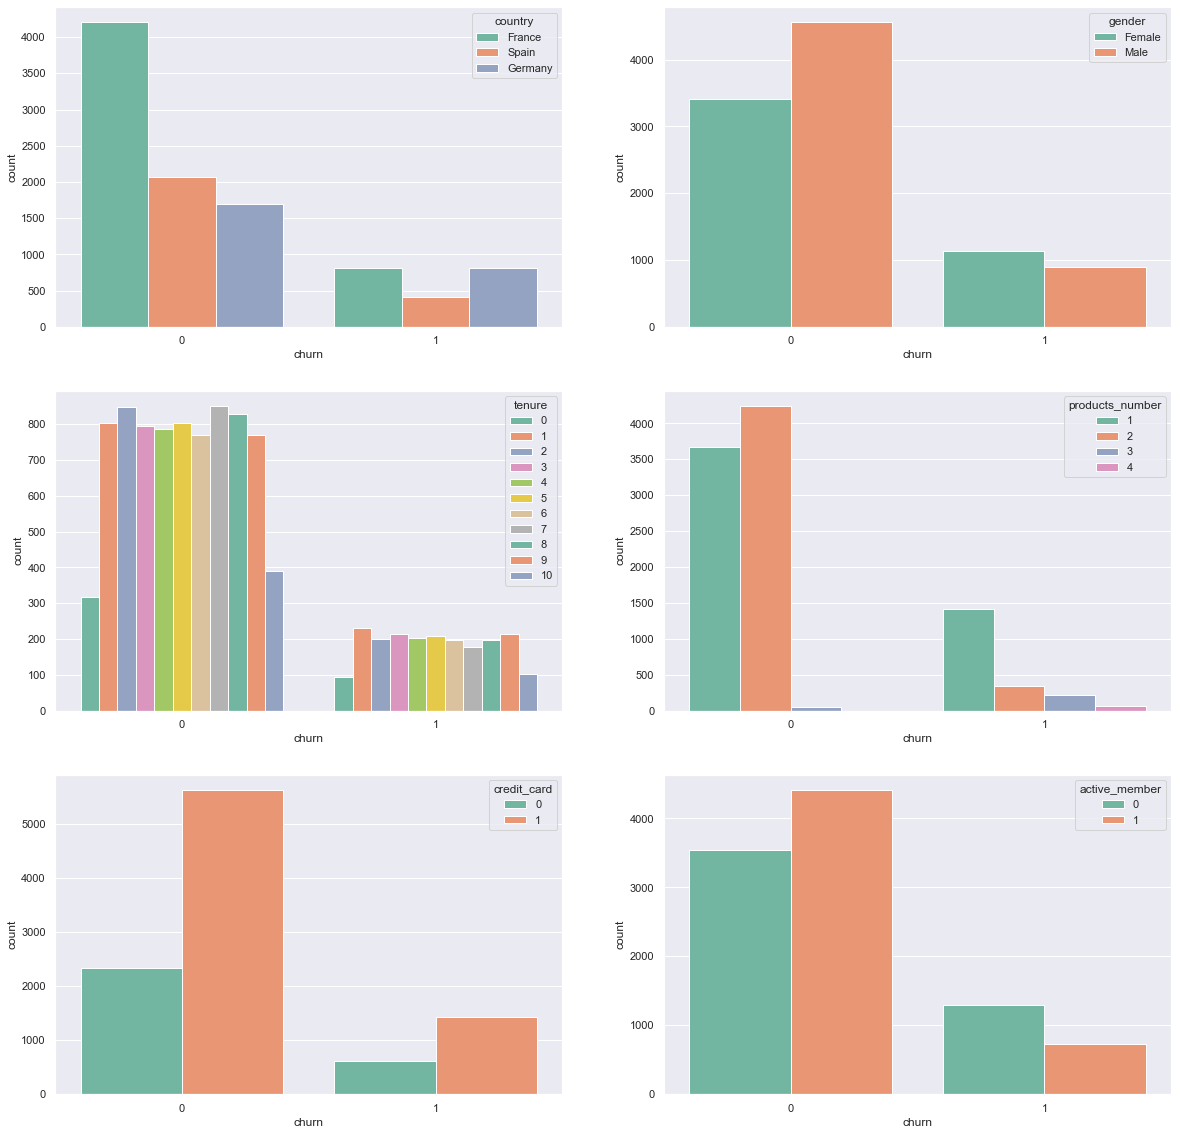

In [68]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'churn', hue= 'country', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'churn', hue= 'gender', palette='Set2', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'churn', hue= 'tenure', palette='Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'churn', hue= 'products_number', palette='Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'churn', hue= 'credit_card', palette='Set2', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'churn', hue= 'active_member', palette='Set2', data = df)

In our bivariate analysis we were able to get some insights, product 2 despite having a lot of samples generally does not have a churn problem, men and women are well distributed in churn values, and the other variables are also well distributed.

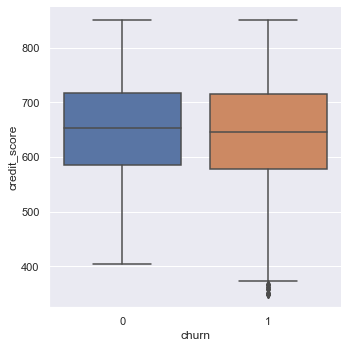

In [69]:
sns.catplot(x = 'churn', y="credit_score", kind="box", data = df)

When we look at the credit score variable, we can't see much difference between the scores and the chance of churn.

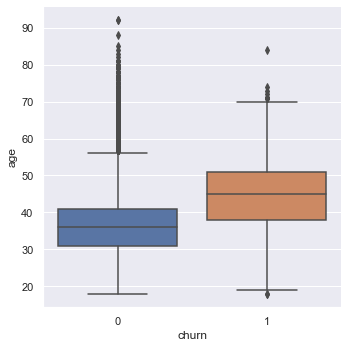

In [70]:
sns.catplot(x = 'churn', y="age", kind="box", data = df)

Looking at the age variable, we can see that older people are generally more prone to churn.

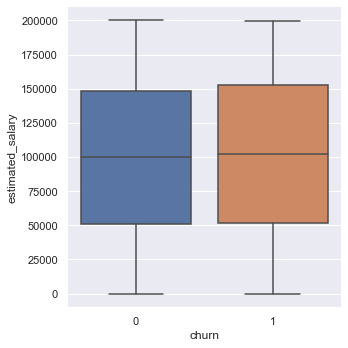

In [71]:
sns.catplot(x = 'churn', y="estimated_salary", kind="box", data = df)

When we look at the estimated_salary variable, we can't see much difference between the scores and the chance of churn.

# Handling Outliers

<AxesSubplot:>

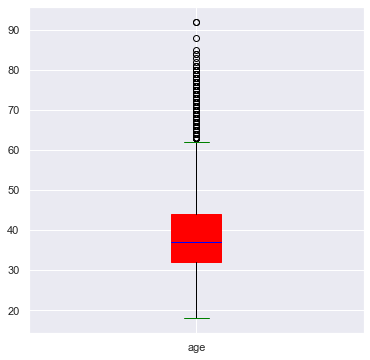

In [72]:
age=df['age']
plt.figure(figsize=(6,6))
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
age.plot.box(color=props2,patch_artist=True,vert=True)

In [73]:
def find_boundaries(df,feature):
    Q1=df[feature].quantile(.25)
    Q3=df[feature].quantile(.75)
    IQR=Q3-Q1
    lower_boundary=Q1-1.5*IQR
    upper_boundary=Q3+1.5*IQR
    
    return lower_boundary,upper_boundary

In [74]:
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [75]:
def remove_outlier(df_in,feature):
    Q1=df_in[feature].quantile(.25)
    Q3=df_in[feature].quantile(.75)
    IQR=Q3-Q1
    lower_boundary=Q1-1.5*IQR
    upper_boundary=Q3+1.5*IQR
    df_out=df_in.loc[(df_in[feature]>lower_boundary) & (df_in[feature]<upper_boundary)]
    
    return df_out

In [77]:
lower_age,upper_age=find_boundaries(df,'age')
print(lower_age,upper_age)

14.0 62.0


In [79]:
outliers = find_outliers_IQR(df['age'])
print('number of outliers: '+ str(len(outliers)))

number of outliers: 359


In [85]:
df= remove_outlier(df,'age')

<AxesSubplot:>

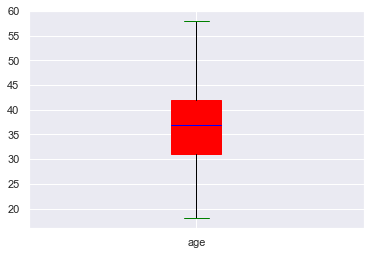

In [86]:
age=df['age']
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
age.plot.box(color=props2,patch_artist=True,vert=True)

<AxesSubplot:>

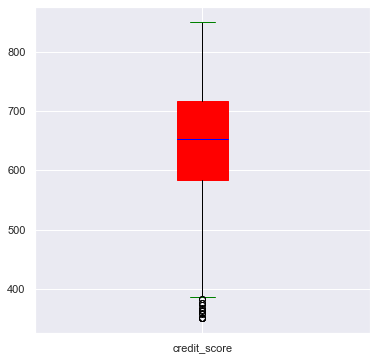

In [87]:
credit_score=df['credit_score']
plt.figure(figsize=(6,6))
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
credit_score.plot.box(color=props2,patch_artist=True,vert=True)

In [88]:
lower_credit_score,upper_credit_score=find_boundaries(df,'credit_score')
print(lower_credit_score,upper_credit_score)

outliers = find_outliers_IQR(df['credit_score'])
print('number of outliers: '+ str(len(outliers)))

383.875 916.875
number of outliers: 15


In [89]:
df= remove_outlier(df,'credit_score')

<AxesSubplot:>

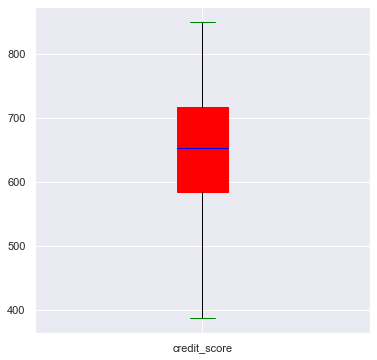

In [91]:
credit_score=df['credit_score']
plt.figure(figsize=(6,6))
props2= dict(boxes='red',whiskers='black',medians='blue',caps='green')
credit_score.plot.box(color=props2,patch_artist=True,vert=True)

# correlations

In [92]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   age               10000 non-null  int64  
 3   tenure            10000 non-null  int64  
 4   balance           10000 non-null  float64
 5   products_number   10000 non-null  int64  
 6   credit_card       10000 non-null  int64  
 7   active_member     10000 non-null  int64  
 8   estimated_salary  10000 non-null  float64
 9   churn             10000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 781.4 KB


In [93]:
num_col = df[['credit_score','balance','age','estimated_salary','churn']]

In [94]:
num_col.corr()

,credit_score,balance,age,estimated_salary,churn
credit_score,1.000000,0.010068,-0.010587,0.001245,-0.017197
balance,0.010068,1.000000,0.042184,0.010946,0.116192
age,-0.010587,0.042184,1.000000,-0.003343,0.357507
estimated_salary,0.001245,0.010946,-0.003343,1.000000,0.010226
churn,-0.017197,0.116192,0.357507,0.010226,1.000000


on based on correlations : 
The descending order of features are as follows:
1. age
2.balance
3.estimated_salary
4.credit score


# Model Building

In [95]:
#Here we will drop the Variables that we dont need to use in our models.
df = df.drop('customer_id', 1)

In [101]:
X = df.iloc[:, 0:10].values
y = df.iloc[:, 10].values

Balancing Classes

In [103]:
from imblearn.over_sampling import RandomOverSampler

In [104]:
ros = RandomOverSampler(random_state=0)

In [105]:
X, y = ros.fit_resample(X, y)

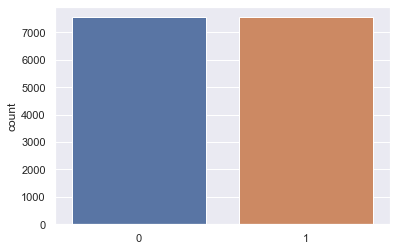

In [106]:
ax = sns.countplot(x=y)

Label Encoder

In [108]:
#Using LabelEncoder to transform categorical variables into continuous variables.

In [119]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [122]:
#label encoding 'country'
label_encoder = preprocessing.LabelEncoder()
df['country']= label_encoder.fit_transform(df['country'])

In [124]:
#label encoding 'gender'
label_encoder = preprocessing.LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender'])

StandardScaler

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

Train Test Split

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)

In [129]:
X_train.shape, y_train.shape

((10572, 10), (10572,))

In [130]:
X_test.shape, y_test.shape

((4532, 10), (4532,))

# Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression

In [133]:
Logi_Reg = LogisticRegression()
LR_Model = Logi_Reg.fit(X_train, y_train)

In [135]:
Logi_Pred = LR_Model.predict(X_test)
Logi_Pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [136]:
# confusion_matrix
pd.crosstab(y_test, Logi_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1646,592,2238
1,700,1594,2294
All,2346,2186,4532


In [137]:
confusion_matrix(y_test, Logi_Pred)

array([[1646,  592],
       [ 700, 1594]], dtype=int64)

In [138]:
# classification_report

print(classification_report(y_test, Logi_Pred))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      2238
           1       0.73      0.69      0.71      2294

    accuracy                           0.71      4532
   macro avg       0.72      0.72      0.71      4532
weighted avg       0.72      0.71      0.71      4532



In [271]:
# accuracy_score
Logi_acc = accuracy_score(y_test, Logi_Pred)
Logi_acc 

0.7149161518093556

In [144]:
#ROC Curve
false_positive_rateLR,true_positive_rateLR,thresholdsLR=sklearn.metrics.roc_curve(y_test, Logi_Pred)

In [145]:
roc_aucLR=auc(false_positive_rateLR,true_positive_rateLR)

In [146]:
roc_aucLR

0.7151671259601727

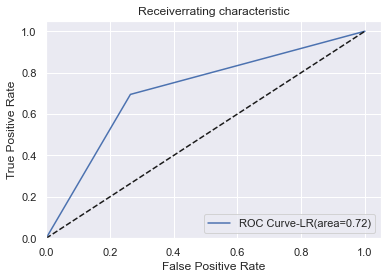

In [148]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateLR,true_positive_rateLR,label='ROC Curve-LR(area=%0.2f)'%roc_aucLR)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()

# DECISION TREE

In [150]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from statsmodels.stats.stattools import durbin_watson

In [151]:
dt = DecisionTreeClassifier(max_features = None,
                            max_depth = 45,
                            min_samples_split = 3,
                            min_samples_leaf = 30,
                            random_state=42)

In [152]:
model = dt.fit(X_train, y_train)

In [153]:
dtprdt=model.predict(X_test)

In [154]:
dtprdt

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [156]:
#cross tab
pd.crosstab(y_test,dtprdt,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,0,1,All
Acctual,,,
0,1764,474,2238
1,485,1809,2294
All,2249,2283,4532


In [157]:
print(classification_report(y_test,dtprdt))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79      2238
           1       0.79      0.79      0.79      2294

    accuracy                           0.79      4532
   macro avg       0.79      0.79      0.79      4532
weighted avg       0.79      0.79      0.79      4532



In [158]:
DT_acc=accuracy_score(y_test,dtprdt)
DT_acc

0.7883936451897617

In [166]:
#ROC Curve
false_positive_rateDT,true_positive_rateDT,thresholdsDT=sklearn.metrics.roc_curve(y_test, dtprdt)
roc_aucDT=auc(false_positive_rateDT,true_positive_rateDT)
roc_aucDT

0.788391327416667

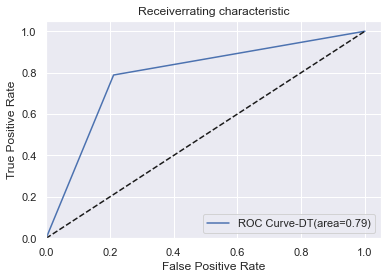

In [167]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateDT,true_positive_rateDT,label='ROC Curve-DT(area=%0.2f)'%roc_aucDT)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()

# Random Forest

In [169]:
from sklearn.ensemble import RandomForestClassifier

In [170]:
#create the model with 100 tress
rf=RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt')

In [171]:
rfFit=rf.fit(X_train,y_train)

In [172]:
#actual class prediction
y_predRF=rfFit.predict(X_test)
y_predRF

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [173]:
#cross tab
pd.crosstab(y_test,y_predRF,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,0,1,All
Acctual,,,
0,2038,200,2238
1,53,2241,2294
All,2091,2441,4532


In [174]:
print(classification_report(y_test,y_predRF))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      2238
           1       0.92      0.98      0.95      2294

    accuracy                           0.94      4532
   macro avg       0.95      0.94      0.94      4532
weighted avg       0.95      0.94      0.94      4532



In [175]:
RF_Acc=accuracy_score(y_test,y_predRF)
RF_Acc

0.9441747572815534

In [267]:
#ROC Curve
false_positive_rateRF,true_positive_rateRF,thresholdsRF=sklearn.metrics.roc_curve(y_test,y_predRF)
roc_aucRF=auc(false_positive_rateRF,true_positive_rateRF)
roc_aucRF

0.9437653730873484

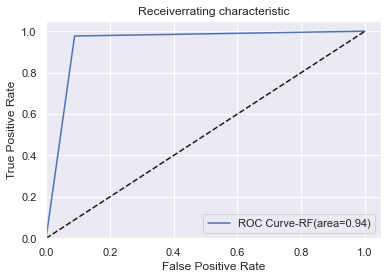

In [268]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateRF,true_positive_rateRF,label='ROC Curve-RF(area=%0.2f)'%roc_aucRF)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()

# Grid search model

In [178]:
from sklearn.model_selection import GridSearchCV

In [179]:
param_grid={'bootstrap':[True],'max_depth':[5,6,7,8],'max_features':['auto','log2'],'n_estimators':[25,50]}

In [180]:
rfr_grid=RandomForestClassifier(random_state=1)

In [181]:
g_search=GridSearchCV(estimator=rfr_grid,param_grid=param_grid,cv=3)

In [182]:
gmod=g_search.fit(X_train,y_train)

In [183]:
#best parameters
print(gmod.best_params_)

{'bootstrap': True, 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 50}


In [185]:
gprd=gmod.predict(X_test)
gprd

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [186]:
#cross tab
pd.crosstab(y_test,gprd,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,0,1,All
Acctual,,,
0,1872,366,2238
1,524,1770,2294
All,2396,2136,4532


In [187]:
print(classification_report(y_test,gprd))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2238
           1       0.83      0.77      0.80      2294

    accuracy                           0.80      4532
   macro avg       0.80      0.80      0.80      4532
weighted avg       0.81      0.80      0.80      4532



In [188]:
Grid_acc=accuracy_score(y_test,gprd)
Grid_acc

0.8036187113857016

In [265]:
#ROC Curve
false_positive_rateGR,true_positive_rateGR,thresholdsGR=sklearn.metrics.roc_curve(y_test,gprd)
roc_aucGR=auc(false_positive_rateGR,true_positive_rateGR)
roc_aucGR

0.8040195778239538

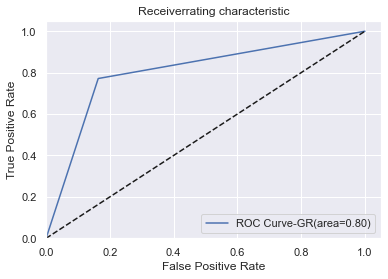

In [266]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateGR,true_positive_rateGR,label='ROC Curve-GR(area=%0.2f)'%roc_aucGR)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()

# Random search model

In [191]:
rfr=RandomForestClassifier(random_state=1)

In [192]:
from sklearn.model_selection import RandomizedSearchCV
rfr_random=RandomizedSearchCV(estimator=rfr,param_distributions=param_grid,n_iter=20,cv=3,random_state=421)

In [193]:
rmod=rfr_random.fit(X_train,y_train)

In [194]:
#best parameters
print(rmod.best_params_)

{'n_estimators': 50, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': True}


In [196]:
rprd=rmod.predict(X_test)
rprd

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [197]:
#cross tab
pd.crosstab(y_test,rprd,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,0,1,All
Acctual,,,
0,1872,366,2238
1,524,1770,2294
All,2396,2136,4532


In [198]:
print(classification_report(y_test,rprd))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      2238
           1       0.83      0.77      0.80      2294

    accuracy                           0.80      4532
   macro avg       0.80      0.80      0.80      4532
weighted avg       0.81      0.80      0.80      4532



In [199]:
RanSearch_acc=accuracy_score(y_test,rprd)
RanSearch_acc

0.8036187113857016

In [263]:
#ROC Curve
false_positive_rateRR,true_positive_rateRR,thresholdsRR=sklearn.metrics.roc_curve(y_test,rprd)
roc_aucRR=auc(false_positive_rateRR,true_positive_rateRR)
roc_aucRR

0.8040195778239538

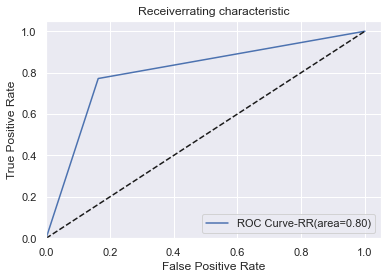

In [264]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateRR,true_positive_rateRR,label='ROC Curve-RR(area=%0.2f)'%roc_aucRR)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()

# Adaptive Boosting

In [203]:
from sklearn.ensemble import AdaBoostClassifier

In [204]:
ada=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)

In [205]:
adaFit=ada.fit(X_train,y_train)

In [206]:
predADA=ada.predict(X_test)
predADA

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [207]:
#cross tab
pd.crosstab(y_test,predADA,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,0,1,All
Acctual,,,
0,1808,430,2238
1,596,1698,2294
All,2404,2128,4532


In [208]:
print(classification_report(y_test,predADA)) 

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      2238
           1       0.80      0.74      0.77      2294

    accuracy                           0.77      4532
   macro avg       0.78      0.77      0.77      4532
weighted avg       0.78      0.77      0.77      4532



In [210]:
ADABoost_acc=accuracy_score(y_test,predADA)
ADABoost_acc

0.7736098852603707

In [261]:
#ROC Curve
false_positive_rateADA,true_positive_rateADA,thresholdsADA=sklearn.metrics.roc_curve(y_test,predADA)
roc_aucADA=auc(false_positive_rateADA,true_positive_rateADA)
roc_aucADA

0.7740279845702315

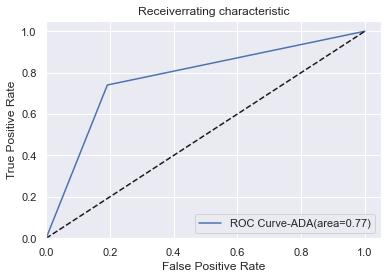

In [262]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateADA,true_positive_rateADA,label='ROC Curve-ADA(area=%0.2f)'%roc_aucADA)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()

# GRADBOOST

In [213]:
from sklearn.ensemble import GradientBoostingClassifier

In [214]:
grad=GradientBoostingClassifier(learning_rate = 0.03, max_depth = 5, random_state = 0)

In [215]:
gradFit=grad.fit(X_train,y_train)

In [217]:
predGRAD=grad.predict(X_test)
predGRAD

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [218]:
#cross tab
pd.crosstab(y_test,predGRAD,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,0,1,All
Acctual,,,
0,1834,404,2238
1,578,1716,2294
All,2412,2120,4532


In [219]:
print(classification_report(y_test,predGRAD))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2238
           1       0.81      0.75      0.78      2294

    accuracy                           0.78      4532
   macro avg       0.78      0.78      0.78      4532
weighted avg       0.79      0.78      0.78      4532



In [221]:
GBoost_acc=accuracy_score(y_test,predGRAD)
GBoost_acc

0.7833186231244483

In [252]:
#ROC Curve
false_positive_rateGB,true_positive_rateGB,thresholdsGB=sklearn.metrics.roc_curve(y_test, predGRAD)
roc_aucGB=auc(false_positive_rateGB,true_positive_rateGB)
roc_aucGB

0.7837600205065395

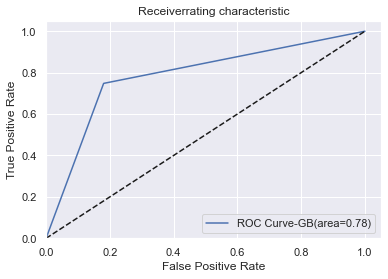

In [253]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateGB,true_positive_rateGB,label='ROC Curve-GB(area=%0.2f)'%roc_aucGB)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()

# KNN

In [224]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [225]:
df_knn = knn.fit(X_train, y_train)

In [254]:
y_predknn = df_knn.predict(X_test)
y_predknn

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [227]:
#cross tab
pd.crosstab(y_test,y_predknn,margins=True,rownames=['Acctual'],colnames=['predict'])

predict,0,1,All
Acctual,,,
0,1661,577,2238
1,322,1972,2294
All,1983,2549,4532


In [229]:
print(classification_report(y_test,y_predknn))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      2238
           1       0.77      0.86      0.81      2294

    accuracy                           0.80      4532
   macro avg       0.81      0.80      0.80      4532
weighted avg       0.81      0.80      0.80      4532



In [250]:
KNN_acc=accuracy_score(y_test,y_predknn)
KNN_acc

0.8016328331862312

In [255]:
#ROC Curve
false_positive_rateKNN,true_positive_rateKNN,thresholdsKNN=sklearn.metrics.roc_curve(y_test,y_predknn)
roc_aucKNN=auc(false_positive_rateKNN,true_positive_rateKNN)
roc_aucKNN

0.8009071728478456

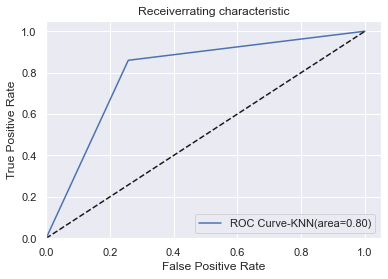

In [256]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateKNN,true_positive_rateKNN,label='ROC Curve-KNN(area=%0.2f)'%roc_aucKNN)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()

# Naïve Bayes

In [232]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [233]:
NB_Model = NB.fit(X_train, y_train)

In [235]:
NB_Pred = NB_Model.predict(X_test)
NB_Pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [236]:
# confusion_matrix
pd.crosstab(y_test, NB_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1787,451,2238
1,706,1588,2294
All,2493,2039,4532


In [237]:
print(classification_report(y_test,NB_Pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      2238
           1       0.78      0.69      0.73      2294

    accuracy                           0.74      4532
   macro avg       0.75      0.75      0.74      4532
weighted avg       0.75      0.74      0.74      4532



In [238]:
NB_acc=accuracy_score(y_test,NB_Pred)
NB_acc

0.7447043248014121

In [257]:
#ROC Curve
false_positive_rateNB,true_positive_rateNB,thresholdsNB=sklearn.metrics.roc_curve(y_test,NB_Pred)
roc_aucNB=auc(false_positive_rateNB,true_positive_rateNB)
roc_aucNB

0.7453607070704709

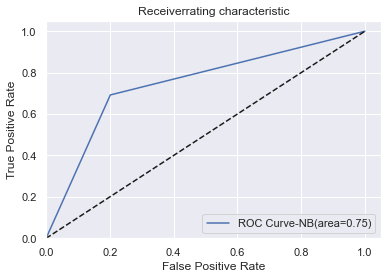

In [258]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateNB,true_positive_rateNB,label='ROC Curve-NB(area=%0.2f)'%roc_aucNB)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()

# SVM

In [239]:
from sklearn.svm import SVC

In [240]:
svm = SVC(kernel = 'linear', random_state = 1, C = 1.0)

In [244]:
svm_model=svm.fit(X_train, y_train)

In [245]:
svm_Pred = svm_model.predict(X_test)
svm_Pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [246]:
# confusion_matrix
pd.crosstab(y_test,svm_Pred, rownames = ['Actual'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,1677,561,2238
1,734,1560,2294
All,2411,2121,4532


In [247]:
print(classification_report(y_test,svm_Pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.72      2238
           1       0.74      0.68      0.71      2294

    accuracy                           0.71      4532
   macro avg       0.72      0.71      0.71      4532
weighted avg       0.72      0.71      0.71      4532



In [248]:
svm_acc=accuracy_score(y_test,svm_Pred)
svm_acc

0.7142541924095323

In [259]:
#ROC Curve
false_positive_rateSVM,true_positive_rateSVM,thresholdsSVM=sklearn.metrics.roc_curve(y_test,svm_Pred)
roc_aucSVM=auc(false_positive_rateSVM,true_positive_rateSVM)
roc_aucSVM

0.7146823161481987

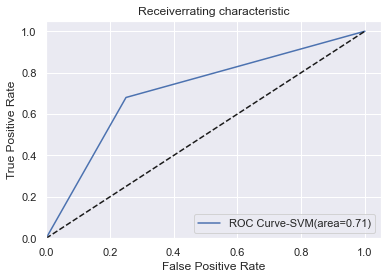

In [260]:
#Plot
%matplotlib inline
plt.figure()
plt.plot(false_positive_rateSVM,true_positive_rateSVM,label='ROC Curve-SVM(area=%0.2f)'%roc_aucSVM)
plt.plot([0,1],[0,1],'k--')#k for black,r for red,b for blue,g for green
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic')
plt.legend(loc='lower right')
plt.show()

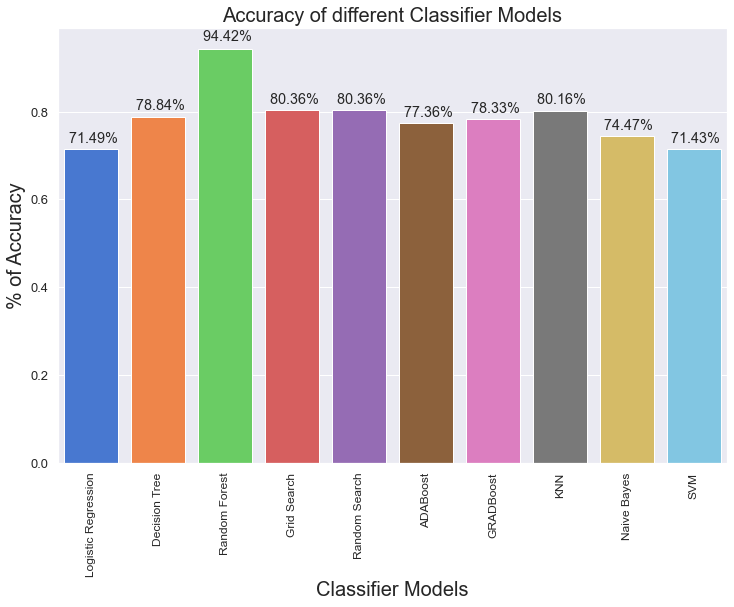

In [275]:
list_acc = [Logi_acc,DT_acc,RF_Acc,Grid_acc,RanSearch_acc,ADABoost_acc,GBoost_acc,KNN_acc,NB_acc,svm_acc]

list1 = ['Logistic Regression','Decision Tree','Random Forest','Grid Search','Random Search','ADABoost','GRADBoost','KNN','Naive Bayes','SVM']

plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')
ax = sns.barplot(x = list1, y = list_acc, palette = 'muted', saturation = 1.5)
plt.xlabel('Classifier Models', fontsize = 20)
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 90)
plt.yticks(fontsize = 13)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height : .2%}', (x + width/2, y + height*1.02), ha = 'center', fontsize = 'x-large')

plt.show()